<a href="https://colab.research.google.com/github/tkhro1024/competition/blob/main/theroom_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## the room door - Housing Price




In [ ]:
# import library
import os
import pandas as pd 
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import lightgbm as lgb 
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
import csv
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
# データの読み込み
train = pd.read_csv("/content/drive/MyDrive/theroom/d_bukken_train.csv")
test = pd.read_csv("/content/drive/MyDrive/theroom/d_bukken_test.csv")

# 新しいセクション

In [ ]:
#cwdの移動
os.chdir("/content/drive/MyDrive/theroom/")

In [ ]:
#train.csvとtest.csvで個別に読み込むとダミー変数の数が異なり、分析がかけられないことから、
#一度結合し、ダミー変数化をする。その後ファイル分割をして元の形に戻す。
csv_files = glob.glob('*.csv')

list = []
for file in csv_files:
    list.append(pd.read_csv(file))
    
df = pd.concat(list)
df.to_csv('total.csv',index=False) #確認と保存のため掃き出し。

In [ ]:
#統合したものをtotalに挿入。
total = pd.read_csv("/content/drive/MyDrive/theroom/total.csv")

In [ ]:
print(train.columns.values)

['id' 'price_per_tsubo' 'use_classification' 'minute_to_station'
 'land_space' 'land_shape' 'frontage_length' 'frontal_road_direction'
 'frontal_road_kind' 'frontal_road_width' 'building_land_ratio'
 'floor_land_ratio']


In [ ]:
# 説明変数
X = pd.get_dummies(total[['minute_to_station',
 'land_space', 'land_shape', 'frontage_length', 'frontal_road_direction',
 'frontal_road_kind', 'frontal_road_width', 'building_land_ratio',
 'floor_land_ratio']]) 
# 目的変数
y = total['price_per_tsubo'] 

In [ ]:
#ダミー変数確認
X.dtypes

minute_to_station            float64
land_space                   float64
frontage_length              float64
frontal_road_width           float64
building_land_ratio          float64
floor_land_ratio             float64
land_shape_ほぼ台形                uint8
land_shape_ほぼ整形                uint8
land_shape_ほぼ正方形               uint8
land_shape_ほぼ長方形               uint8
land_shape_不整形                 uint8
land_shape_台形                  uint8
land_shape_正方形                 uint8
land_shape_袋地等                 uint8
land_shape_長方形                 uint8
frontal_road_direction_北       uint8
frontal_road_direction_北東      uint8
frontal_road_direction_北西      uint8
frontal_road_direction_南       uint8
frontal_road_direction_南東      uint8
frontal_road_direction_南西      uint8
frontal_road_direction_東       uint8
frontal_road_direction_西       uint8
frontal_road_kind_区画街路         uint8
frontal_road_kind_国道           uint8
frontal_road_kind_市道           uint8
frontal_road_kind_村道           uint8
f

In [ ]:
#散らばりの確認
np.std(total.drop(["id","price_per_tsubo"],axis=1))

minute_to_station           2.360833e+01
land_space                  3.534971e+02
frontage_length             8.621439e+00
frontal_road_width          2.977120e+00
building_land_ratio         1.162811e+01
floor_land_ratio            7.835511e+01
従業員数                        3.974539e+03
Annual recurring revenue    3.257119e+06
dtype: float64

In [ ]:
#再度,trainとtestの割り振り
X_train = X[:345]
y_train = y[:345]
X_test = X[345:]
y_test = y[345:]

In [ ]:
#変数同士の相関を観察（全体把握のため）
total[:345].corr().style.background_gradient(axis=None)

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,従業員数,Annual recurring revenue
id,1.000000,0.021540,-0.063646,0.003238,0.006032,-0.053736,-0.012745,-0.024363,nan,nan
price_per_tsubo,0.021540,1.000000,-0.655151,-0.202636,-0.233926,0.204464,0.587568,0.519029,nan,nan
minute_to_station,-0.063646,-0.655151,1.000000,0.152690,0.181059,-0.107618,-0.493264,-0.459502,nan,nan
land_space,0.003238,-0.202636,0.152690,1.000000,0.654574,-0.013229,-0.062527,-0.043420,nan,nan
frontage_length,0.006032,-0.233926,0.181059,0.654574,1.000000,0.029670,-0.204477,-0.190421,nan,nan
frontal_road_width,-0.053736,0.204464,-0.107618,-0.013229,0.029670,1.000000,0.293646,0.323884,nan,nan
building_land_ratio,-0.012745,0.587568,-0.493264,-0.062527,-0.204477,0.293646,1.000000,0.959038,nan,nan
floor_land_ratio,-0.024363,0.519029,-0.459502,-0.043420,-0.190421,0.323884,0.959038,1.000000,nan,nan
従業員数,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Annual recurring revenue,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
#(全体把握のため）
model = sm.OLS(y_train,sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        price_per_tsubo   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     20.32
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           7.63e-54
Time:                        09:59:21   Log-Likelihood:                -4550.1
No. Observations:                 345   AIC:                             9156.
Df Residuals:                     317   BIC:                             9264.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
#データの分割ができているかの確認
X_train

,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,land_shape_ほぼ台形,land_shape_ほぼ整形,land_shape_ほぼ正方形,land_shape_ほぼ長方形,land_shape_不整形,land_shape_台形,land_shape_正方形,land_shape_袋地等,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西,frontal_road_kind_区画街路,frontal_road_kind_国道,frontal_road_kind_市道,frontal_road_kind_村道,frontal_road_kind_町道,frontal_road_kind_県道,frontal_road_kind_私道,frontal_road_kind_農道,frontal_road_kind_道路,frontal_road_kind_都道
0,8.0,140.0,10.0,5.0,60.0,200.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,13.0,85.0,11.5,4.0,80.0,200.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,14.0,115.0,8.0,6.0,60.0,200.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,13.0,110.0,6.5,5.0,80.0,200.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,145.0,13.5,6.0,60.0,200.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,13.0,140.0,9.1,16.0,60.0,200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
341,60.0,410.0,24.5,4.0,40.0,80.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
342,13.0,340.0,4.5,3.6,60.0,200.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
343,14.0,420.0,11.0,2.8,40.0,80.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
y_train

0      1000000.0
1       890000.0
2       880000.0
3       880000.0
4       880000.0
         ...    
340     220000.0
341     280000.0
342     530000.0
343     460000.0
344     270000.0
Name: price_per_tsubo, Length: 345, dtype: float64

In [ ]:
X_test

,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,land_shape_ほぼ台形,land_shape_ほぼ整形,land_shape_ほぼ正方形,land_shape_ほぼ長方形,land_shape_不整形,land_shape_台形,land_shape_正方形,land_shape_袋地等,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西,frontal_road_kind_区画街路,frontal_road_kind_国道,frontal_road_kind_市道,frontal_road_kind_村道,frontal_road_kind_町道,frontal_road_kind_県道,frontal_road_kind_私道,frontal_road_kind_農道,frontal_road_kind_道路,frontal_road_kind_都道
345,29.0,60.0,6.4,7.0,60.0,200.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
346,60.0,135.0,13.0,6.0,40.0,80.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
347,30.0,135.0,4.9,5.0,40.0,80.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
348,15.0,140.0,9.0,7.5,60.0,200.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
349,60.0,750.0,5.0,2.7,40.0,80.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5846,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5847,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5848,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

345     170000.0
346     400000.0
347     270000.0
348     720000.0
349      70000.0
          ...   
5845         NaN
5846         NaN
5847         NaN
5848         NaN
5849         NaN
Name: price_per_tsubo, Length: 5505, dtype: float64

In [ ]:
# モデルのインスタンスの作成
model = lgb.LGBMRegressor() 
# モデルの学習
model.fit(X_train, y_train)
# テストデータの予測
y_pred = model.predict(X_test)

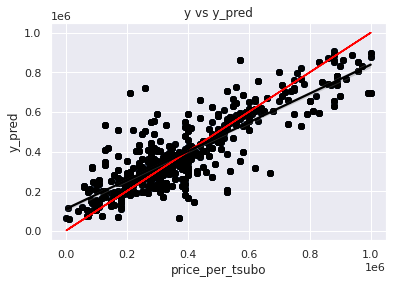

In [ ]:
# 散布図を描画(真値 vs 予測値)
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred) # 散布図のプロット
plt.xlabel('y') # x軸ラベル"
plt.ylabel('y_pred') # y軸ラベル|
plt.title('y vs y_pred') # グラフタイトル
sns.regplot(y_test, y_pred, color ='black') 

In [ ]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, y_pred) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

# r2 : 決定係数
r2 = r2_score(y_test, y_pred)
print('R2 :',r2)

ValueError: ignored

In [ ]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [ ]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression_l2', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[1]	valid_0's rmse: nan
[2]	valid_0's rmse: nan
[3]	valid_0's rmse: nan
[4]	valid_0's rmse: nan
[5]	valid_0's rmse: nan
[6]	valid_0's rmse: nan
[7]	valid_0's rmse: nan
[8]	valid_0's rmse: nan
[9]	valid_0's rmse: nan
[10]	valid_0's rmse: nan
[11]	valid_0's rmse: nan
[12]	valid_0's rmse: nan
[13]	valid_0's rmse: nan
[14]	valid_0's rmse: nan
[15]	valid_0's rmse: nan
[16]	valid_0's rmse: nan
[17]	valid_0's rmse: nan
[18]	valid_0's rmse: nan
[19]	valid_0's rmse: nan
[20]	valid_0's rmse: nan
[21]	valid_0's rmse: nan
[22]	valid_0's rmse: nan
[23]	valid_0's rmse: nan
[24]	valid_0's rmse: nan
[25]	valid_0's rmse: nan
[26]	valid_0's rmse: nan
[27]	valid_0's rmse: nan
[28]	valid_0's rmse: nan
[29]	valid_0's rmse: nan
[30]	valid_0's rmse: nan
[31]	valid_0's rmse: nan
[32]	valid_0's rmse: nan
[33]	valid_0's rmse: nan
[34]	valid_0's rmse: nan
[35]	valid_0's rmse: nan
[36]	valid_0's rmse: nan
[37]	valid_0's rmse: nan
[38]	valid_0's rmse: nan
[39]	valid_0's rmse: nan
[40]	valid_0's rmse: nan
[41]	vali

In [ ]:
# 特徴量重要度の算出
f_importance = np.array(model.feature_importance()) 
# 正規化
f_importance = f_importance / np.sum(f_importance)
df_importance = pd.DataFrame({'feature':X, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
1,"(l, a, n, d, _, s, p, a, c, e)",0.261116
2,"(f, r, o, n, t, a, g, e, _, l, e, n, g, t, h)",0.195635
3,"(f, r, o, n, t, a, l, _, r, o, a, d, _, w, i, ...",0.146322
0,"(m, i, n, u, t, e, _, t, o, _, s, t, a, t, i, ...",0.144705
9,"(l, a, n, d, _, s, h, a, p, e, _, ほ, ぼ, 長, 方, 形)",0.053355
4,"(b, u, i, l, d, i, n, g, _, l, a, n, d, _, r, ...",0.046888
25,"(f, r, o, n, t, a, l, _, r, o, a, d, _, k, i, ...",0.039612
20,"(f, r, o, n, t, a, l, _, r, o, a, d, _, d, i, ...",0.014551
21,"(f, r, o, n, t, a, l, _, r, o, a, d, _, d, i, ...",0.012935
18,"(f, r, o, n, t, a, l, _, r, o, a, d, _, d, i, ...",0.011318


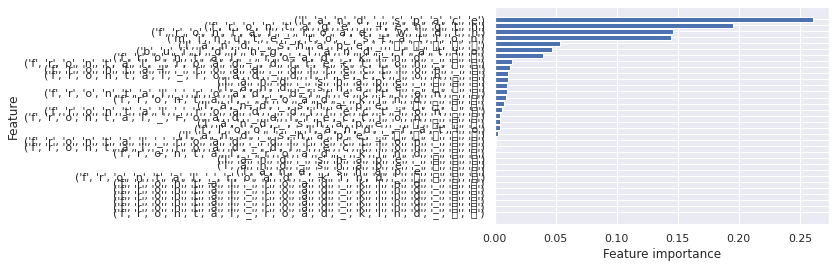

In [ ]:
plot_feature_importance(df_importance)

In [ ]:
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出 //
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':X, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
0,"(m, i, n, u, t, e, _, t, o, _, s, t, a, t, i, ...",0.619153
1,"(l, a, n, d, _, s, p, a, c, e)",0.116037
3,"(f, r, o, n, t, a, l, _, r, o, a, d, _, w, i, ...",0.089673
2,"(f, r, o, n, t, a, g, e, _, l, e, n, g, t, h)",0.059260
4,"(b, u, i, l, d, i, n, g, _, l, a, n, d, _, r, ...",0.035245
25,"(f, r, o, n, t, a, l, _, r, o, a, d, _, k, i, ...",0.030099
9,"(l, a, n, d, _, s, h, a, p, e, _, ほ, ぼ, 長, 方, 形)",0.012694
5,"(f, l, o, o, r, _, l, a, n, d, _, r, a, t, i, o)",0.011098
18,"(f, r, o, n, t, a, l, _, r, o, a, d, _, d, i, ...",0.006104
14,"(l, a, n, d, _, s, h, a, p, e, _, 長, 方, 形)",0.003493


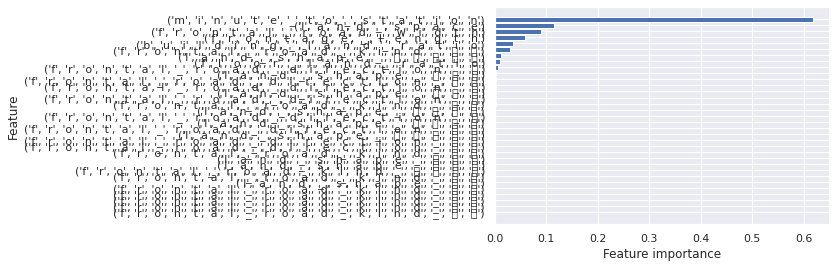

In [ ]:
plot_feature_importance(df_importance)

In [ ]:
# ランダムフォレスト回帰オブジェクト生成
rfr = RandomForestRegressor(n_estimators=100)
# 学習の実行
rfr.fit(X_train, y_train)
# テストデータで予測実行
y_pred2 = rfr.predict(X_test)

ValueError: ignored

NameError: ignored

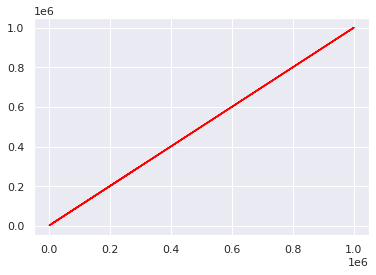

In [ ]:
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred2) # 散布図のプロット
plt.xlabel('y') # x軸ラベル"
plt.ylabel('y_pred') # y軸ラベル|
plt.title('y vs y_pred') # グラフタイトル
sns.regplot(y_test, y_pred2, color ='black') 

In [ ]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, y_pred2) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

# r2 : 決定係数
r2 = r2_score(y_test,y_pred2)
print('R2 :',r2)

NameError: ignored

In [ ]:
X_test = X_test.assign(pred=y_pred)

In [ ]:
error = []
error = X_test["pred"] - y_test

In [ ]:
error

345     337057.040769
346     -53582.735291
347     137781.422120
348     -18224.612923
349       5988.531228
            ...      
5845              NaN
5846              NaN
5847              NaN
5848              NaN
5849              NaN
Length: 5505, dtype: float64

In [ ]:
X_test = X_test.assign(error = error)

In [ ]:
SE = []
SE = (X_test["error"] - X_test["error"].mean()) / X_test["error"].std()

In [ ]:
X_test = X_test.assign(SE = SE)

In [ ]:
#閾値の設定
condition = SE >= 0

In [ ]:
condition

345      True
346     False
347      True
348     False
349      True
        ...  
5845    False
5846    False
5847    False
5848    False
5849    False
Name: error, Length: 5505, dtype: bool

In [ ]:
condition1 = SE >= 1

In [ ]:
condition1

345      True
346     False
347      True
348     False
349     False
        ...  
5845    False
5846    False
5847    False
5848    False
5849    False
Name: error, Length: 5505, dtype: bool

In [ ]:
condition2 = SE >= 2

In [ ]:
condition2

345      True
346     False
347     False
348     False
349     False
        ...  
5845    False
5846    False
5847    False
5848    False
5849    False
Name: error, Length: 5505, dtype: bool

In [ ]:
# reset.indexで行番号を調整する
condition_test = condition.reset_index(drop=True)
condition_test1 = condition1.reset_index(drop=True)
condition_test2 = condition2.reset_index(drop=True)

In [ ]:
condition_test

0        True
1       False
2        True
3       False
4        True
        ...  
5500    False
5501    False
5502    False
5503    False
5504    False
Name: error, Length: 5505, dtype: bool

In [ ]:
#列を抽出テーブルに挿入
test['Model A'] = condition_test
test['Model B'] = condition_test1
test['Model C'] = condition_test2

In [ ]:
#行の追加ができているかの確認
test

,id,price_per_tsubo,use_classification,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio,Model A,Model B,Model C
0,796263,1000000,住宅地,8,140,長方形,10.0,西,市道,5.0,60,200,True,True,True
1,721758,890000,住宅地,13,85,ほぼ長方形,11.5,南,市道,4.0,80,200,False,False,False
2,728990,880000,住宅地,14,115,長方形,8.0,南東,市道,6.0,60,200,True,True,False
3,844020,880000,住宅地,13,110,長方形,6.5,南,市道,5.0,80,200,False,False,False
4,844104,880000,住宅地,9,145,台形,13.5,南,市道,6.0,60,200,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,827198,90000,住宅地,60,660,ほぼ長方形,30.0,南西,私道,4.0,40,80,False,False,False
110,788457,82000,住宅地,60,400,ほぼ台形,25.5,東,私道,5.0,40,80,False,False,False
111,676621,54000,住宅地,90,185,ほぼ長方形,12.0,南西,道路,4.0,30,50,True,False,False
112,781298,6100,住宅地,60,540,不整形,40.0,西,市道,4.0,40,80,False,False,False


In [ ]:
#xlsxで掃き出し
test.to_excel('/Users/tkhro1024/Desktop/theroom/pred_error.xlsx', sheet_name='pred_error')

FileNotFoundError: ignored